<a href="https://colab.research.google.com/github/wihasnakerang/DeepL/blob/main/EfficientNet_%26_Densenet201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [1]:
import pandas as pd
import numpy as np
import os, sys
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import cv2
import json
# import SqueezeNet

from tensorflow import keras  # Import Keras dari TensorFlow
from tensorflow.keras.applications import EfficientNetB0
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, datasets, models, losses, optimizers, metrics, utils, callbacks
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image as tf_ppimg

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

DATADIR = '/content/drive/MyDrive/semester 7/deepL/dataset_cnn'   # base directory
CATEGORIES = ['kupu_hijau_biru', 'kupu_pantat_merah', 'kupu_raja_helena', 'kupu_jarak', 'kupu_harimau_kuning_hijau', 'kupu_batik_cap', 'kupu_raja_limau', 'kupu_jojo']    # base directory

In [4]:
def count_images(directory):
    # Pastikan iterasi dilakukan pada subdirektori di folder utama
    for category in os.listdir(directory):
        path = os.path.join(directory, category)
        if os.path.isdir(path):  # Pastikan hanya memproses direktori
            images = os.listdir(path)  # Ambil semua file di subdirektori
            num_images = len(images)  # Hitung jumlah file
            print(f'{category}: {num_images} images')

# Jalankan fungsi untuk menghitung jumlah gambar
count_images('/content/drive/MyDrive/semester 7/deepL/dataset_cnn')

kupu_hijau_biru: 100 images
kupu_pantat_merah: 95 images
kupu_raja_helena: 8 images
kupu_jarak: 7 images
kupu_harimau_kuning_hijau: 100 images
kupu_batik_cap: 100 images
kupu_raja_limau: 100 images
kupu_jojo: 100 images


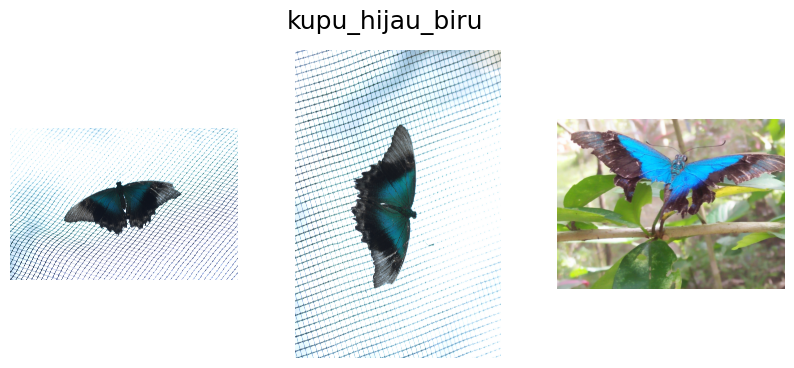

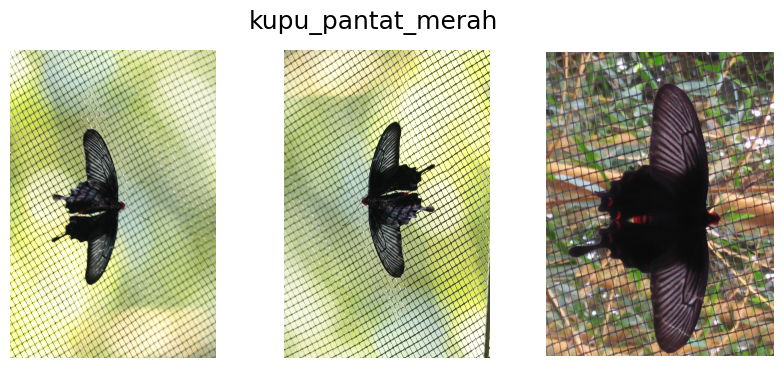

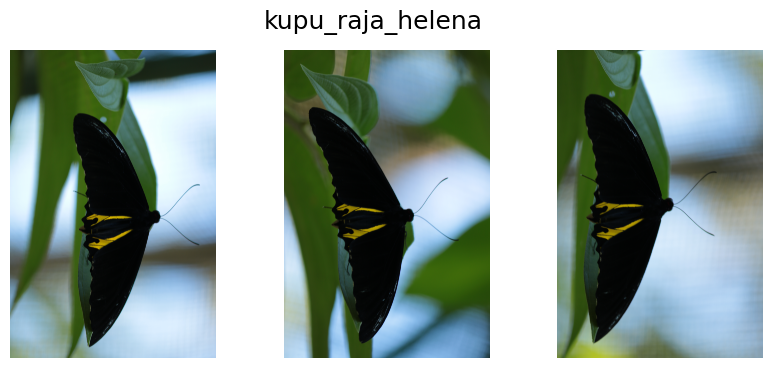

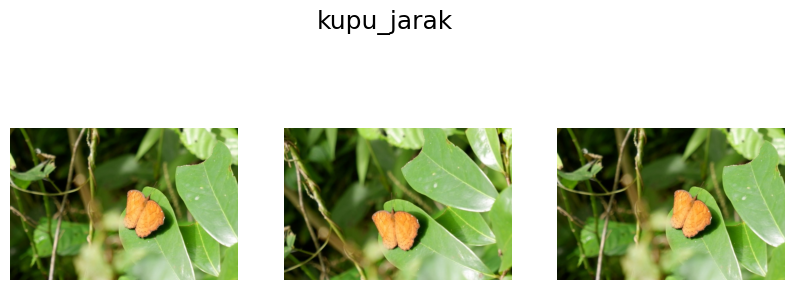

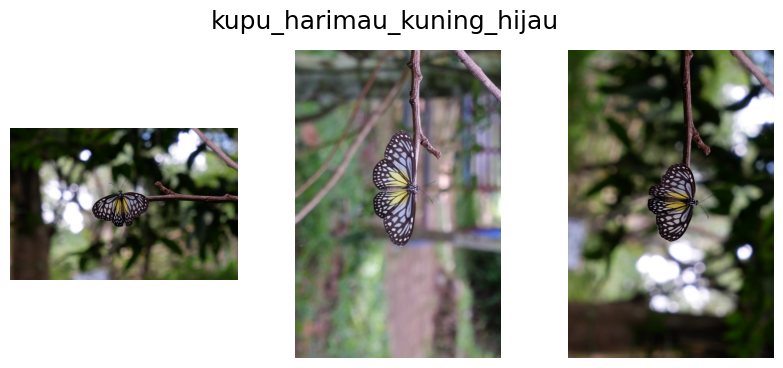

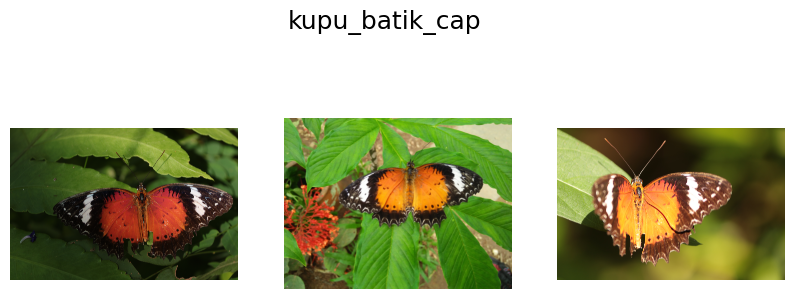

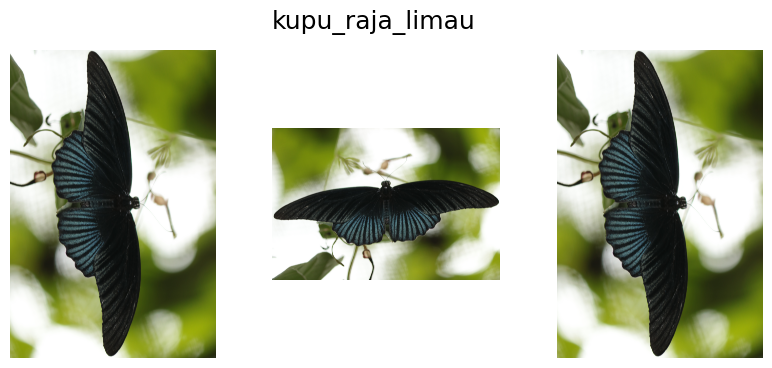

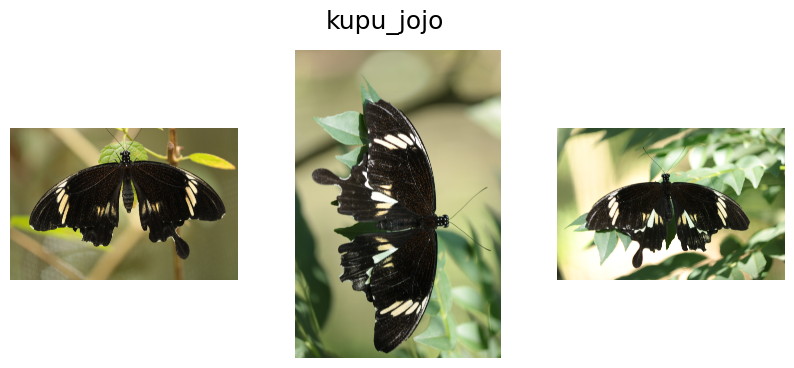

In [5]:
for category in CATEGORIES:
  #constructing the path
  path = os.path.join(DATADIR, category)
  images = os.listdir(path)

  fig, ax = plt.subplots(1, 3, figsize = (10, 4))
  fig.suptitle(f'{category}', fontsize = 18)

  for i in range(3):
    img_name = images[np.random.randint(0, len(images))]
    img_path = os.path.join(path, img_name)
    img_array = cv2.imread(img_path)

    # converting the BGR images to RGB
    img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

    ax[i].imshow(img_rgb)
    ax[i].axis('off')


In [6]:
IMG_SIZE = 224
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
img = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
# plt.imshow(img)

In [7]:
training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    labels = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, labels])
      except Exception as e:
        pass

create_training_data()

In [8]:
X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

In [9]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

DENSENET201

In [11]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from keras import Model, Input
input_shape = (224, 224, 3)
model_input = Input(shape=input_shape)


base_model = DenseNet201(weights='imagenet', include_top=False, input_shape = (IMG_SIZE, IMG_SIZE, 3))

for layer in base_model.layers:
    layer.trainable = False

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [12]:
model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(8, activation = 'softmax'),
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 176s 9s/step - accuracy: 0.2755 - loss: 2.5329
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 200s 9s/step - accuracy: 0.6251 - loss: 1.2890
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 199s 9s/step - accuracy: 0.7803 - loss: 0.7098
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 148s 9s/step - accuracy: 0.8446 - loss: 0.4868
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 141s 9s/step - accuracy: 0.9012 - loss: 0.3654
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 141s 9s/step - accuracy: 0.9271 - loss: 0.2200
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 144s 9s/step - accuracy: 0.9493 - loss: 0.1758
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 148s 9s/step - accuracy: 0.9697 - loss: 0.1398
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 196s 9s/step - accuracy: 0.9455 - loss: 0.1754
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 162s 10s/step - accuracy: 0.9487 - loss: 0.1621


In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy : {accuracy * 100}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 43s 8s/step - accuracy: 0.9735 - loss: 0.2657
Model Accuracy : 97.54098653793335


In [14]:
pred = np.argmax(model.predict(X_test), axis = 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 51s 11s/step


In [15]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       1.00      1.00      1.00        18
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00        22
           5       0.90      1.00      0.95        19
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        23

    accuracy                           0.98       122
   macro avg       0.98      0.93      0.94       122
weighted avg       0.98      0.98      0.97       122



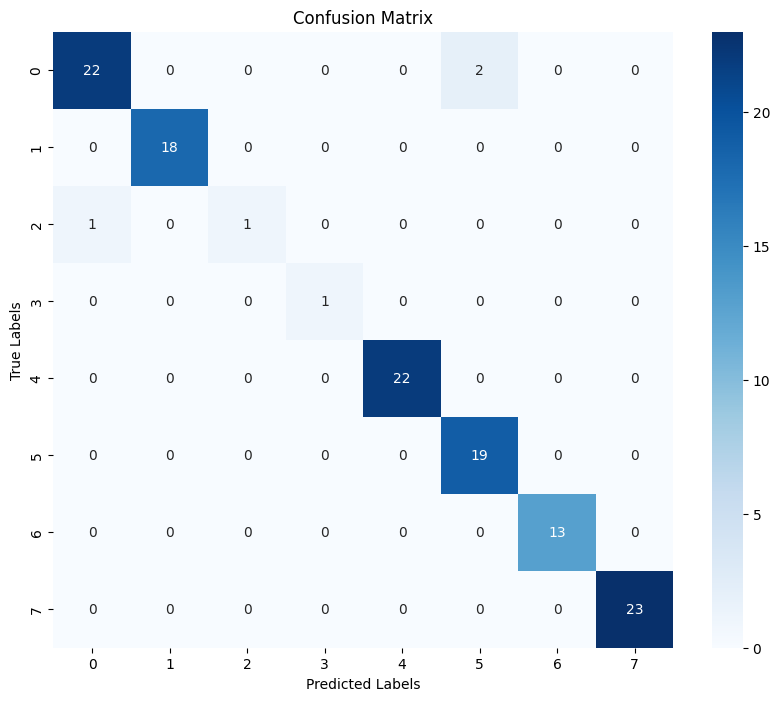

              precision    recall  f1-score   support

     Class 0       0.96      0.92      0.94        24
     Class 1       1.00      1.00      1.00        18
     Class 2       1.00      0.50      0.67         2
     Class 3       1.00      1.00      1.00         1
     Class 4       1.00      1.00      1.00        22
     Class 5       0.90      1.00      0.95        19
     Class 6       1.00      1.00      1.00        13
     Class 7       1.00      1.00      1.00        23

    accuracy                           0.98       122
   macro avg       0.98      0.93      0.94       122
weighted avg       0.98      0.98      0.97       122



In [16]:
# Buat confusion matrix
cm = confusion_matrix(y_test, pred)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(8), yticklabels=range(8))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Laporan klasifikasi
print(classification_report(y_test, pred, target_names=[f'Class {i}' for i in range(8)]))

EFFICIENTNET

In [17]:
efficient_net = EfficientNetB0(weights = 'imagenet',
                               include_top = False,
                               input_shape = (IMG_SIZE, IMG_SIZE, 3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [18]:
model = keras.Sequential([
    efficient_net,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(8, activation = 'softmax'),
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 211s 10s/step - accuracy: 0.6664 - loss: 0.9457
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 195s 9s/step - accuracy: 0.9754 - loss: 0.1110
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 203s 10s/step - accuracy: 0.9636 - loss: 0.2274
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 199s 9s/step - accuracy: 0.9805 - loss: 0.0630
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 202s 9s/step - accuracy: 1.0000 - loss: 0.0043
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 211s 10s/step - accuracy: 0.9757 - loss: 0.1323
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 195s 9s/step - accuracy: 0.9969 - loss: 0.0264
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 202s 9s/step - accuracy: 0.9517 - loss: 0.4503
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 232s 11s/step - accuracy: 0.9685 - loss: 0.1838
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 215s 12s/step - accuracy: 0.9484 - loss: 0.2333


In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy : {accuracy * 100}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6944 - loss: 8.5113
Model Accuracy : 64.75409865379333


In [20]:
pred = np.argmax(model.predict(X_test), axis = 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step


In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.87      0.72      0.79        18
           2       0.25      0.50      0.33         2
           3       0.14      1.00      0.25         1
           4       0.51      0.95      0.67        22
           5       1.00      0.47      0.64        19
           6       0.68      1.00      0.81        13
           7       0.88      0.91      0.89        23

    accuracy                           0.65       122
   macro avg       0.54      0.70      0.55       122
weighted avg       0.62      0.65      0.60       122



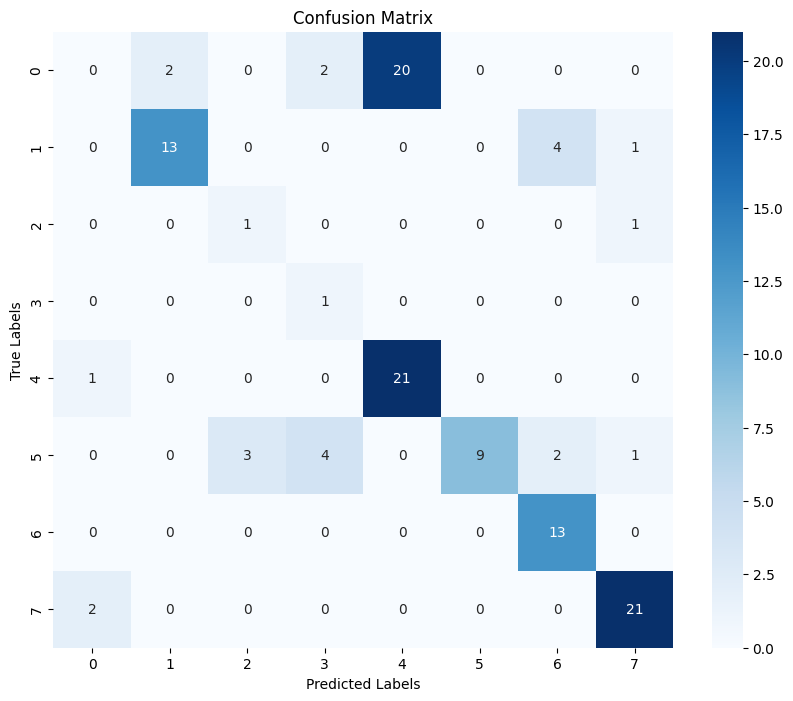

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        24
     Class 1       0.87      0.72      0.79        18
     Class 2       0.25      0.50      0.33         2
     Class 3       0.14      1.00      0.25         1
     Class 4       0.51      0.95      0.67        22
     Class 5       1.00      0.47      0.64        19
     Class 6       0.68      1.00      0.81        13
     Class 7       0.88      0.91      0.89        23

    accuracy                           0.65       122
   macro avg       0.54      0.70      0.55       122
weighted avg       0.62      0.65      0.60       122



In [23]:
# Buat confusion matrix
cm = confusion_matrix(y_test, pred)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(8), yticklabels=range(8))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Laporan klasifikasi
print(classification_report(y_test, pred, target_names=[f'Class {i}' for i in range(8)]))